# Data Importing and Analysis

In [3]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-8dcdd595-7f75-0391-eb8e-81e42e527b2c)


In [4]:
from google.colab import drive     
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv 

--2023-05-26 12:42:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.004s  

2023-05-26 12:42:40 (46.7 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [6]:
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", 
                 parse_dates=["Date"], 
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [7]:
df.shape

(2787, 5)

In [8]:
df[-1:]

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-18,BTC,43144.471291,46439.33657,46622.853437,42102.34643


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [10]:
prices = df['Closing Price (USD)']

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import datetime

Text(0.5, 1.0, 'Price of Bitcoin from 1 Oct 2013 to 18 May 2021')

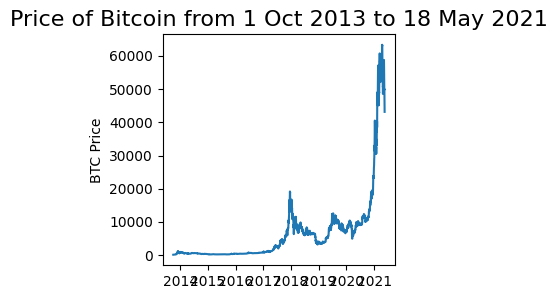

In [12]:
plt.figure(figsize=(3, 3))
plt.plot(prices)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
# plt.legend(fontsize=14);

In [13]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    # print(line)
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [14]:
datetime.strptime('2013-10-01', "%Y-%m-%d")

datetime.datetime(2013, 10, 1, 0, 0)

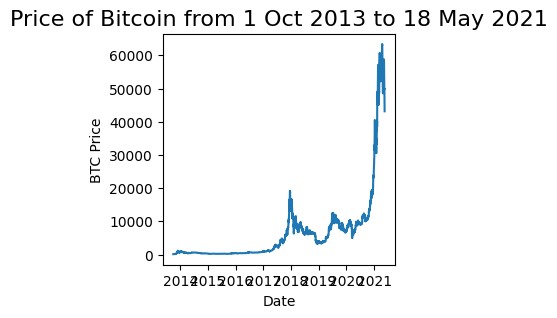

In [15]:
plt.figure(figsize=(3, 3))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

In [16]:
df.index

DatetimeIndex(['2013-10-01', '2013-10-02', '2013-10-03', '2013-10-04',
               '2013-10-05', '2013-10-06', '2013-10-07', '2013-10-08',
               '2013-10-09', '2013-10-10',
               ...
               '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16',
               '2021-05-17', '2021-05-18'],
              dtype='datetime64[ns]', name='Date', length=2787, freq=None)

## Train Test Split

In [17]:
timesteps = df.index.to_numpy()

In [18]:
prices = df['Closing Price (USD)'].to_numpy()

In [19]:
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)


(2229, 558, 2229, 558)

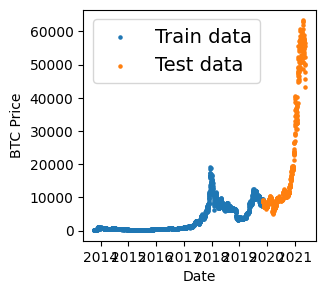

In [20]:
plt.figure(figsize=(3,3))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

#Models

## Naive Model

Naive Forecast: Also known as the "no-change" or "last-value" method, this approach assumes that future values will be the same as the most recent observed value. For example, if you are forecasting sales for the next month using the naive forecast, you would simply predict that the sales will be the same as the sales in the current month.

Seasonal Naive Forecast: This method is an extension of the naive forecast that incorporates seasonality. It assumes that the future values will be the same as the corresponding value from the previous season. For example, if you have monthly sales data that exhibits a seasonal pattern, the seasonal naive forecast would predict that the sales for the next month will be the same as the sales in the same month of the previous year.

Average Forecast: This method calculates the average of historical values and uses it as the forecast for future periods. It assumes that future values will be similar to the average of past values. This approach is useful when there is no clear trend or seasonality in the data.

Moving Average Forecast: Similar to the average forecast, the moving average method calculates the average of a fixed number of most recent observations and uses it as the forecast. The size of the moving window determines the number of past values considered. This method can help smooth out short-term fluctuations in the data.

Exponential Smoothing: Exponential smoothing methods, such as Simple Exponential Smoothing (SES) and Holt's Linear Exponential Smoothing (Holt's Method), are simple yet widely used naive approaches. They assign weights to past observations, giving more importance to recent values. These methods assume that the future values are a combination of the current observation and the previous forecast.

In [19]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

In [20]:
naive_forecast = y_test[:-1]

In [21]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [55]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

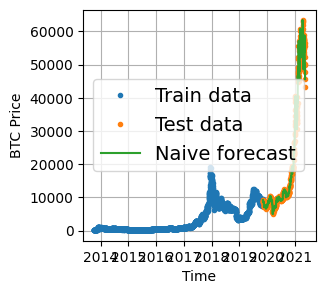

In [23]:
plt.figure(figsize=(3, 3))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

In [24]:
len(naive_forecast), len(y_test)

(557, 558)

## Evaluation of naive model

In [25]:
import tensorflow as tf

In [26]:
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [27]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

The naïve model should achieve an MASE of 1 (or very close to 1). Any model worse than the naïve forecast will achieve an MASE of >1 and any model better than the naïve forecast will achieve an MASE of <1.

In [28]:
naive_results = evaluate_preds(y_test[1:], naive_forecast)

In [29]:
y_test[1:10]

array([8794.35864452, 8798.04205463, 9081.18687849, 8711.53433917,
       8760.89271814, 8749.52059102, 8656.97092235, 8500.64355816,
       8469.2608989 ])

In [30]:
naive_forecast[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [31]:
tf.reduce_mean(y_test).numpy()

20056.632963737222

The average price of Bitcoin in the test dataset is: $20,056 (note: average may not be the best measure here, since the highest price is over 3x this value and the lowest price is over 4x lower)

Each prediction in naive forecast is on average off by: $567

# Windowing the data

In [32]:
X_train.shape

(2229,)

In [33]:
y_train.shape

(2229,)

In [34]:
y_train

array([ 123.65499   ,  125.455     ,  108.58483   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

In [35]:
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [36]:
get_labelled_windows(np.expand_dims(np.arange(8), axis = 0))

(array([[0, 1, 2, 3, 4, 5, 6]]), array([[7]]))

In [37]:
prices_copy = prices.copy()

In [38]:
len(prices_copy)

2787

In [39]:
np.arange(7 + 1)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [40]:
indexes = np.expand_dims(np.arange(7 + 1), axis = 0) + np.expand_dims(np.arange(len(prices_copy)-(7 + 1 -1)), axis = 0).T 

In [41]:
indexes

array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]])

In [42]:
def make_windows(x, window = 7, horizon = 1):
  window_step = np.expand_dims(np.arange(window + horizon), axis = 0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window + horizon -1)), axis = 0).T
  print(window_indexes)
  windows_and_hor = x[window_indexes]
  windows, hor = get_labelled_windows(windows_and_hor, horizon = horizon)

  return windows, hor

In [43]:
X, y = make_windows(prices_copy)

[[   0    1    2 ...    5    6    7]
 [   1    2    3 ...    6    7    8]
 [   2    3    4 ...    7    8    9]
 ...
 [2777 2778 2779 ... 2782 2783 2784]
 [2778 2779 2780 ... 2783 2784 2785]
 [2779 2780 2781 ... 2784 2785 2786]]


In [44]:
X[:2]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ]])

In [45]:
y[:2]

array([[123.033],
       [124.049]])

In [46]:
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [47]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(X, y)

In [48]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [49]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="/content/gdrive/MyDrive/Timeseries_checkpoints"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) 

In [50]:
os.path.join("save_path", "model_name")

'save_path/model_name'

# Models

## Model 1

In [51]:
def model1(WINDOW_SIZE, HORIZON):
  input = tf.keras.Input((WINDOW_SIZE, ))
  # print("errr")
  x = tf.keras.layers.Dense(128, activation = 'relu')(input)
  x = tf.keras.layers.Dense(HORIZON, activation = 'linear')(x)

  model = tf.keras.Model(inputs = input, outputs = x, name = 'model1')
  # print("err2")
  return model

In [52]:
model_1 = model1(7, 1)

In [53]:
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
# model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
#             y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
#             epochs=100,
#             verbose=1,
#             batch_size=128,
#             validation_data=(test_windows, test_labels),
#             callbacks=[create_model_checkpoint(model_name=model_1.name)])

In [54]:
# model_1.evaluate(test_windows, test_labels)

In [55]:
model_1 = tf.keras.models.load_model("/content/gdrive/MyDrive/Timeseries_checkpoints/model1")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 2s 6ms/step - loss: 574.9586 - mae: 574.9586


[574.9585571289062, 574.9585571289062]

In [56]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [57]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 3ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8837.333, 8769.899, 9051.345, 8764.107, 8704.015, 8783.458,
        8642.575, 8528.475, 8447.877, 8528.529], dtype=float32)>)

In [58]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 574.9585,
 'mse': 1178236.8,
 'rmse': 1085.4662,
 'mape': 2.5780828,
 'mase': 1.0100428}

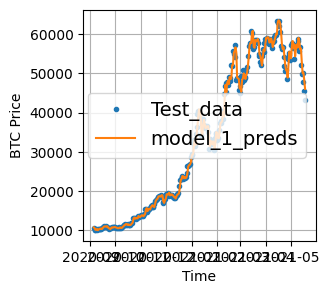

In [59]:
offset = 300
plt.figure(figsize=(3, 3))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

## Model 2

In [60]:
HORIZON, WINDOW_SIZE = 1, 30

In [61]:
def create_data_splits(horizon = HORIZON, window_size =WINDOW_SIZE):
  full_windows, full_labels = make_windows(prices, window_size, horizon)
# len(full_windows), len(full_labels
  train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
  len(train_windows), len(test_windows), len(train_labels), len(test_labels)
  return train_windows, test_windows, train_labels, test_labels

In [62]:
train_windows, test_windows, train_labels, test_labels = create_data_splits(1, 30)

[[   0    1    2 ...   28   29   30]
 [   1    2    3 ...   29   30   31]
 [   2    3    4 ...   30   31   32]
 ...
 [2754 2755 2756 ... 2782 2783 2784]
 [2755 2756 2757 ... 2783 2784 2785]
 [2756 2757 2758 ... 2784 2785 2786]]


In [63]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [64]:
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# model_2.fit(train_windows,
#             train_labels,
#             epochs=100,
#             batch_size=128,
#             verbose=0,
#             validation_data=(test_windows, test_labels),
#             callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [65]:
# model_2.evaluate(test_windows, test_labels)

In [66]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [67]:
def load_evaluate_and_metrics(model_name, test_windows = test_windows, test_labels = test_labels):
  model = tf.keras.models.load_model("/content/gdrive/MyDrive/Timeseries_checkpoints/" + model_name)
  model.evaluate(test_windows, test_labels)
  model_preds = make_preds(model,
                           input_data=test_windows)
  model_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_preds)
  offset = 300
  plt.figure(figsize=(5, 5))
  # Account for the test_window offset
  plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
  plot_time_series(timesteps=X_test[-len(test_windows):], values=model_preds, start=offset, format="-", label=model_name +"_preds") 
     
  return model, model_results

18/18 [==============================] - 0s 5ms/step


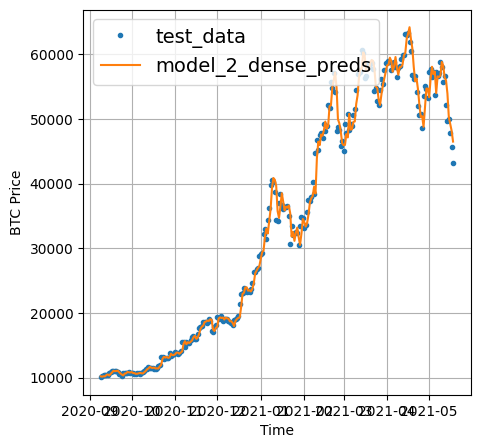

In [68]:
model_2, model_2_results = load_evaluate_and_metrics("model_2_dense")

In [69]:
model_2_results

{'mae': 588.50586,
 'mse': 1215939.0,
 'rmse': 1102.6962,
 'mape': 2.6248984,
 'mase': 1.0287141}

In [70]:
X_test[-len(test_windows):].shape

(552,)

In [71]:
X_test.shape

(558,)

## Model 3

In [72]:
HORIZON = 7
WINDOW_SIZE = 30

In [73]:
train_windows, test_windows, train_labels, test_labels = create_data_splits(horizon = HORIZON, window_size =WINDOW_SIZE)

[[   0    1    2 ...   34   35   36]
 [   1    2    3 ...   35   36   37]
 [   2    3    4 ...   36   37   38]
 ...
 [2748 2749 2750 ... 2782 2783 2784]
 [2749 2750 2751 ... 2783 2784 2785]
 [2750 2751 2752 ... 2784 2785 2786]]


In [74]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [75]:
from tensorflow.keras import layers

In [76]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# model_3.fit(train_windows,
#             train_labels,
#             batch_size=128,
#             epochs=100,
#             verbose=0,
#             validation_data=(test_windows, test_labels),
#             callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [77]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 20933.7383


20933.73828125

In [80]:
model_3 = tf.keras.models.load_model("/content/gdrive/MyDrive/Timeseries_checkpoints/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 1238.9760


1238.9759521484375

In [81]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9287.873 , 9329.145 , 9225.027 , 9424.035 , 9247.521 , 9102.748 ,
        9703.549 ],
       [9155.463 , 9238.1455, 8931.935 , 9181.846 , 8872.86  , 8877.274 ,
        9298.94  ],
       [9047.251 , 9093.972 , 8923.385 , 9104.759 , 8899.483 , 9055.166 ,
        9083.6045],
       [9192.578 , 9223.194 , 9233.695 , 9385.409 , 9287.956 , 9404.414 ,
        9136.294 ],
       [8899.467 , 8987.86  , 9112.54  , 9146.944 , 9108.01  , 9184.838 ,
        9139.588 ]], dtype=float32)>

In [82]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1238.9758,
 'mse': 5323886.0,
 'rmse': 1425.347,
 'mape': 5.5688562,
 'mase': 2.2046883}

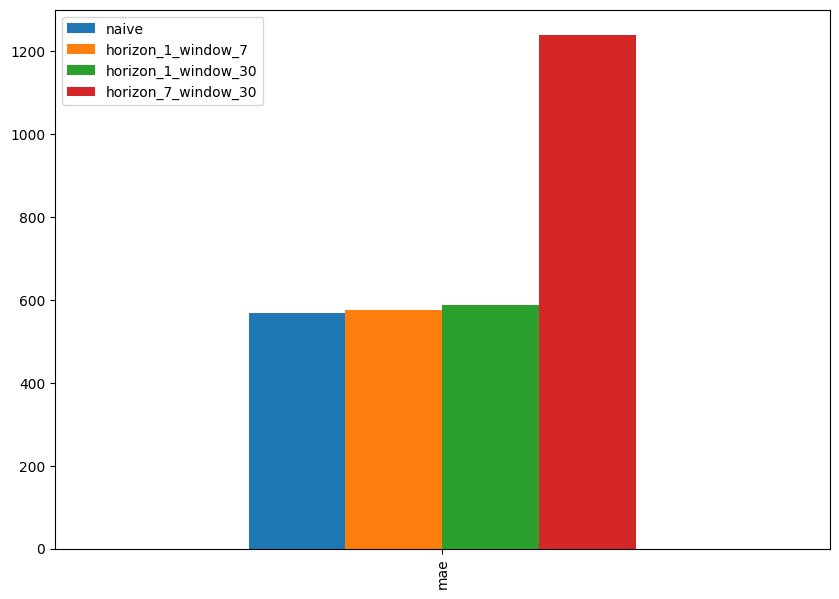

In [83]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

<Axes: >

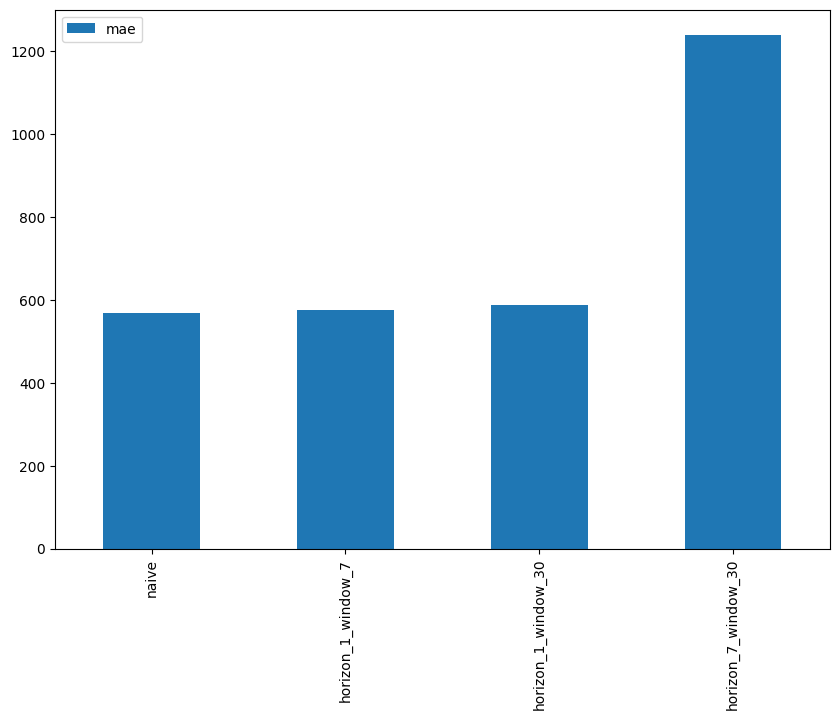

In [84]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).T.plot(figsize=(10, 7), kind="bar")

## Model 4: Conv1D

In [85]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [86]:
train_windows, test_windows, train_labels, test_labels = create_data_splits(horizon = HORIZON, window_size =WINDOW_SIZE)

[[   0    1    2 ...    5    6    7]
 [   1    2    3 ...    6    7    8]
 [   2    3    4 ...    7    8    9]
 ...
 [2777 2778 2779 ... 2782 2783 2784]
 [2778 2779 2780 ... 2783 2784 2785]
 [2779 2780 2781 ... 2784 2785 2786]]


In [87]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [88]:
def model4():
  input = layers.Input(shape = (WINDOW_SIZE,))
  x =layers.Lambda(lambda a: tf.expand_dims(a, axis=1))(input)
  print(input.shape)
  x = layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu")(x)
  x =layers.Dense(HORIZON)(x)

  model = tf.keras.Model(input, x, name = 'model_4_conv')
  return model

In [89]:
model_4_conv = model4()

(None, 7)


In [90]:
model_4_conv.summary()

Model: "model_4_conv"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda (Lambda)             (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [91]:
model_4_conv.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
# model_4_conv.fit(train_windows,
#             train_labels,
#             batch_size=128, 
#             epochs=100,
#             verbose=0,
#             validation_data=(test_windows, test_labels),
#             callbacks=[create_model_checkpoint(model_name=model_4_conv.name)])

In [92]:
model_4 = tf.keras.models.load_model("/content/gdrive/MyDrive/Timeseries_checkpoints/model_4_conv")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 1s 4ms/step - loss: 567.4521


567.4521484375

In [93]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]
     

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8873.637, 8782.193, 8998.293, 8795.567, 8743.585, 8716.577,
       8672.514, 8538.258, 8448.642, 8513.133], dtype=float32)>

In [94]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 567.4521,
 'mse': 1173953.0,
 'rmse': 1083.4911,
 'mape': 2.540663,
 'mase': 0.99685615}

## Model 5: LSTM

In [95]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error

output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# model_5.fit(train_windows,
#             train_labels,
#             epochs=100,
#             verbose=0,
#             batch_size=128,
#             validation_data=(test_windows, test_labels),
#             callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [96]:
model_5 = tf.keras.models.load_model("/content/gdrive/MyDrive/Timeseries_checkpoints/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 583.3367


583.336669921875

In [97]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8899.724, 8799.015, 8947.488, 8770.281, 8743.666, 8680.827,
       8675.79 , 8543.909, 8431.343, 8496.664], dtype=float32)>

In [98]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results
     

{'mae': 583.3367,
 'mse': 1211973.5,
 'rmse': 1100.8966,
 'mape': 2.6208007,
 'mase': 1.024761}

# Multivariate Time Series Data

In [22]:
bitcoin_prices = df['Closing Price (USD)'].to_frame().rename(columns={'Closing Price (USD)': 'Price'})

In [23]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [24]:
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [25]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days
     

(1012, 2414)

In [26]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

In [27]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [28]:
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [29]:
HORIZON = 1
WINDOW_SIZE = 7

In [30]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

In [31]:
bitcoin_prices_windowed.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [32]:
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price {i+1}"] = bitcoin_prices_windowed["Price"].shift(i)

In [33]:
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price 1,Price 2,Price 3,Price 4,Price 5,Price 6,Price 7
Date,,,,,,,,,
2013-10-01,123.65499,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-05,121.33866,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-06,120.65533,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-07,121.79500,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-08,123.03300,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-09,124.04900,25,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483


In [34]:
bitcoin_prices_windowed.dropna(axis = 0, inplace = True)

In [35]:
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price 1,Price 2,Price 3,Price 4,Price 5,Price 6,Price 7
Date,,,,,,,,,
2013-10-07,121.79500,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-08,123.03300,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-09,124.04900,25,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-10,125.96116,25,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-11,125.27966,25,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866
2013-10-12,125.92750,25,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533
2013-10-13,126.38333,25,126.38333,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500
2013-10-14,135.24199,25,135.24199,126.38333,125.92750,125.27966,125.96116,124.04900,123.03300
2013-10-15,133.20333,25,133.20333,135.24199,126.38333,125.92750,125.27966,125.96116,124.04900


In [113]:
X = bitcoin_prices_windowed.drop("Price", axis=1).astype(np.float32) 
y = bitcoin_prices_windowed["Price"].astype(np.float32)
X.head()

,block_reward,Price 1,Price 2,Price 3,Price 4,Price 5,Price 6,Price 7
Date,,,,,,,,
2013-10-07,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-08,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-09,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-10,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-11,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [114]:
y.head()

Date
2013-10-07    121.794998
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
Name: Price, dtype: float32

In [115]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 557, 557)

# Models

## Model 6

In [116]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
# model_6.fit(X_train, y_train,
#             epochs=100,
#             batch_size=128,
#             verbose=0, # only print 1 line per epoch
#             validation_data=(X_test, y_test),
#             callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [117]:
model_6 = tf.keras.models.load_model("/content/gdrive/MyDrive/Timeseries_checkpoints/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 20.3819


20.381879806518555

In [118]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8800.83 , 8787.862, 9068.704, 8725.65 , 8752.974, 8742.935,
       8658.18 , 8502.137, 8462.933, 8532.188], dtype=float32)>

In [119]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 20.381882,
 'mse': 1324.6277,
 'rmse': 36.395435,
 'mape': 0.09951532,
 'mase': 0.035869416}

In [120]:
model_1_results


{'mae': 574.9585,
 'mse': 1178236.8,
 'rmse': 1085.4662,
 'mape': 2.5780828,
 'mase': 1.0100428}

## Model 7: NBEATS

In [121]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [122]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

### Data for Model 7

In [123]:
bitcoin_prices.head()


,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [124]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [125]:
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [126]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [127]:
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [128]:
import tensorflow as tf

In [129]:
%%time

tf.random.set_seed(42)

n_beats_block = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

bc, fc = n_beats_block(stack_input)
res = layers.subtract([stack_input, bc], name=f"subtract_00") 

for i in range(N_STACKS - 1):
  block_bc, block_fc = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(res)
  res = layers.subtract([res, bc], name=f"subtract_{i}") 
  fc = layers.add([fc, block_fc], name=f"add_{i}")


CPU times: user 1.95 s, sys: 19.2 ms, total: 1.97 s
Wall time: 2.08 s


In [130]:
model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=fc, 
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

In [131]:
# model_7.fit(train_dataset,
#             epochs=N_EPOCHS,
#             validation_data=test_dataset,
#             verbose=0, # prevent large amounts of training outputs
#             # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
#             callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
#                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 221: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 407: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 507: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.


In [137]:
model_7.save("/content/gdrive/MyDrive/Timeseries_checkpoints/" + model_7.name)

In [139]:
model_7 = tf.keras.models.load_model("/content/gdrive/MyDrive/Timeseries_checkpoints/model_7_N-BEATS")

In [140]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 1s 1s/step - loss: 576.9465 - mae: 576.9465 - mse: 1164191.1250


[576.946533203125, 576.946533203125, 1164191.125]

In [141]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 798ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8844.648 , 8779.335 , 9071.597 , 8762.827 , 8733.496 , 8766.8955,
       8676.158 , 8474.419 , 8501.839 , 8525.566 ], dtype=float32)>

In [142]:
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 576.94653,
 'mse': 1164191.1,
 'rmse': 1078.9768,
 'mape': 2.6114604,
 'mase': 1.0135353}

## Ensemble Models

In [143]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [144]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 381: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 359: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 459: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 224: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 394: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 494: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 402: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 930: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 702: ReduceLROnPl

In [145]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [146]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 40ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8844.874,  8769.696,  9085.815, ..., 49803.848, 48627.457,
        46509.832],
       [ 8728.233,  8708.259,  9084.231, ..., 49828.883, 47780.254,
        46330.207],
       [ 8819.859,  8741.432,  9054.54 , ..., 50856.766, 48270.133,
        46201.86 ],
       ...,
       [ 8790.669,  8736.42 ,  9135.407, ..., 49401.11 , 49586.87 ,
        45387.758],
       [ 8830.195,  8811.247,  9089.501, ..., 50344.7  , 48403.625,
        46009.914],
       [ 8797.97 ,  8796.556,  9050.632, ..., 50233.3  , 47788.094,
        46423.43 ]], dtype=float32)>

In [147]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 567.27704,
 'mse': 1140419.0,
 'rmse': 1067.904,
 'mape': 2.5507634,
 'mase': 0.99654865}

In [ ]:
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks
  
  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)
  print(std)
  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96 

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95% 
lower, upper = get_upper_lower(preds=ensemble_preds)

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:], 
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

## Model 9: Future Prediction

In [36]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price 1,Price 2,Price 3,Price 4,Price 5,Price 6,Price 7
Date,,,,,,,,,
2013-10-07,121.79500,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-08,123.03300,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-09,124.04900,25,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-10,125.96116,25,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-11,125.27966,25,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [37]:
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [39]:
import tensorflow as tf

In [40]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [42]:
from tensorflow.keras import layers

In [43]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

In [44]:
INTO_FUTURE = 14 

In [78]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)
  input_shape = model.layers[0].input_shape

  print("input shape of model ", input_shape)
  print("window shape ", last_window.shape, tf.expand_dims(last_window, axis=0).shape)
  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    
    # future_pred = model.predict(last_window)

    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [79]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

input shape of model  (None, 7)
window shape  (7,) (1, 7)
1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55245.55859375

1/1 [==============================] - 0s 23ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55245.55859375] -> Prediction: 50794.16015625

1/1 [==============================] - 0s 18ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55245.55859375 50794.16015625] -> Prediction: 48895.31640625

1/1 [==============================] - 0s 18ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55245.55859375 50794.16015625 48895.31640625] -> Prediction: 48231.71484375

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.4712

In [60]:
future_forecast[:10]

[55245.56,
 50794.16,
 48895.316,
 48231.715,
 47764.777,
 47693.95,
 47275.453,
 53306.535,
 49599.223,
 48467.22]

In [61]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D")
  print(start_date) # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  print(end_date)
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [62]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [63]:
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps

2021-05-19 00:00:00
2021-06-02 00:00:00


array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [65]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55245.56 , 50794.16 , 48895.316, 48231.715, 47764.777,
        47693.95 , 47275.453, 53306.535, 49599.223, 48467.22 , 48111.043,
        48569.2  , 49042.3  , 48976.32 ], dtype=float32))

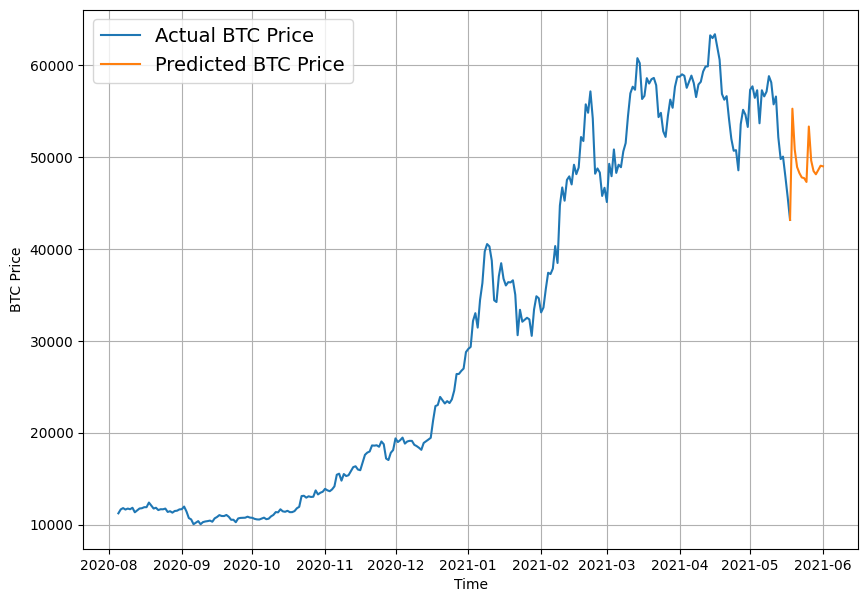

In [66]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")